In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
warnings.filterwarnings('ignore')
%matplotlib inline

In [34]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [35]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [36]:
N = len(data)
train = data[:round(N*0.6)]
test = data[round(N*0.6):round(N*0.8)]
valid = data[round(N*0.8):]

In [37]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [38]:
data['Gender'].replace('Male',1, inplace=True)
data['Gender'].replace('Female',0, inplace=True)

In [39]:
data['OverTime'].replace('Yes',1, inplace=True)
data['OverTime'].replace('No',0, inplace=True)

In [40]:
data['Attrition'].replace('Yes',1, inplace=True)
data['Attrition'].replace('No',0, inplace=True)

In [41]:
data['MaritalStatus'].replace('Yes',1, inplace=True)

In [42]:
data['overall_satisf']= 0.2*(data['RelationshipSatisfaction']+data['EnvironmentSatisfaction']+data['JobSatisfaction']+data['JobInvolvement']+data['WorkLifeBalance'])

In [43]:
data['Age_bin'] = pd.cut(data['Age'], bins=[0,30,40,50,60], labels=['under 30','30-40','40-50','50-60'])

In [44]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'overall_satisf', 'Age_bin'],
      dtype='object')

In [45]:
drop_column = ['RelationshipSatisfaction','EnvironmentSatisfaction', 'JobSatisfaction','JobInvolvement','WorkLifeBalance',"JobLevel"]
data.drop(drop_column, axis=1, inplace = True)

In [46]:
data['fidelity'] = data['NumCompaniesWorked']/(data['TotalWorkingYears']+0.1)

In [47]:
drop_column2 = ['Age','NumCompaniesWorked','TotalWorkingYears',"Over18",'StandardHours']
data.drop(drop_column2, axis=1, inplace = True)

In [48]:
data.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'Gender', 'HourlyRate', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'overall_satisf', 'Age_bin', 'fidelity'],
      dtype='object')

In [49]:
data.drop(['EmployeeCount','EmployeeNumber'],axis=1, inplace = True)

In [50]:
data.drop(['MonthlyRate','HourlyRate','DailyRate'], axis=1, inplace = True)

In [51]:
data.drop('TrainingTimesLastYear', axis=1, inplace = True)

In [52]:
datadf = pd.get_dummies(data, columns = ['BusinessTravel','Department',"Education","Age_bin",'EducationField',"JobRole","MaritalStatus",'StockOptionLevel'],
                             prefix=['BusinessTravel','Department',"Education","Age_bin",'EducationField',"JobRole","MaritalStatus",'StockOptionLevel'])


In [53]:
data.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'overall_satisf',
       'Age_bin', 'fidelity'],
      dtype='object')

In [54]:
datadf

,Attrition,DistanceFromHome,Gender,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,1,1,0,5993,1,11,3,6,4,0,...,0,1,0,0,0,1,1,0,0,0
1,0,8,1,5130,0,23,4,10,7,1,...,1,0,0,0,1,0,0,1,0,0
2,1,2,1,2090,1,15,3,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,3,0,2909,1,11,3,8,7,3,...,1,0,0,0,1,0,1,0,0,0
4,0,2,1,3468,0,12,3,2,2,2,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,23,1,2571,0,17,3,5,2,0,...,0,0,0,0,1,0,0,1,0,0
1466,0,6,1,9991,0,15,3,7,7,1,...,0,0,0,0,1,0,0,1,0,0
1467,0,4,1,6142,1,20,4,6,2,0,...,0,0,0,0,1,0,0,1,0,0
1468,0,2,1,5390,0,14,3,9,6,0,...,0,1,0,0,1,0,1,0,0,0


In [55]:
datadf.columns

Index(['Attrition', 'DistanceFromHome', 'Gender', 'MonthlyIncome', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'overall_satisf', 'fidelity', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'Age_bin_under 30', 'Age_bin_30-40',
       'Age_bin_40-50', 'Age_bin_50-60', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       '

In [56]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [57]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

all_features = datadf.drop("Attrition",axis=1)
Targeted_feature = datadf["Attrition"]

X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1029, 49), (441, 49), (1029,), (441,))

In [58]:
w=[]
for y in y_train:
    if y==1:
        w.append(2)
    else:
        w.append(1)

In [80]:
mean = sum(y_test)/len(y_test)

In [83]:
lst = [0.0]*len(y_test)
accuracy_score(lst,y_test)*10

8.616780045351474

In [59]:
from sklearn.linear_model import LogisticRegression # Logistic Regression

lg = LogisticRegression(C=10)
lg.fit(X_train,y_train)
prediction_lr=lg.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 87.3


In [79]:
lg.predict_proba(X_test)

array([[8.95812616e-01, 1.04187384e-01],
       [9.92677726e-01, 7.32227428e-03],
       [7.86133426e-01, 2.13866574e-01],
       [9.86922882e-01, 1.30771182e-02],
       [9.80074392e-01, 1.99256084e-02],
       [7.74269487e-01, 2.25730513e-01],
       [7.37507828e-01, 2.62492172e-01],
       [9.64825847e-01, 3.51741530e-02],
       [9.68435857e-01, 3.15641433e-02],
       [9.69324563e-01, 3.06754366e-02],
       [4.89752076e-01, 5.10247924e-01],
       [9.32040415e-01, 6.79595852e-02],
       [9.61658736e-01, 3.83412643e-02],
       [9.63255347e-01, 3.67446531e-02],
       [9.69398080e-01, 3.06019203e-02],
       [8.60549019e-01, 1.39450981e-01],
       [7.92219318e-01, 2.07780682e-01],
       [8.39759828e-01, 1.60240172e-01],
       [8.85638954e-01, 1.14361046e-01],
       [9.81742829e-01, 1.82571708e-02],
       [5.96675701e-01, 4.03324299e-01],
       [9.91881507e-01, 8.11849319e-03],
       [9.87345714e-01, 1.26542864e-02],
       [6.80139342e-01, 3.19860658e-01],
       [8.888143

In [60]:
from sklearn.feature_selection import RFE
rfe = RFE(model, 20)
fit = rfe.fit(X_train,y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 20
Selected Features: [ True False  True  True  True False  True  True  True  True  True  True
 False  True False False  True  True False False False False False  True
 False False False False False False False False  True False False  True
 False False False False False  True False False  True  True  True False
 False]
Feature Ranking: [ 1  5  1  1  1 23  1  1  1  1  1  1 24  1  9 22  1  1 15 13 14  8 28  1
  6  3 19 27 12  2  4 21  1 26 17  1 29 20 30 16  7  1 11 10  1  1  1 25
 18]


In [29]:
all_features

,DistanceFromHome,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,overall_satisf,...,MaritalStatus_Single,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5
0,1,5993,1,11,3,6,4,0,5,2.2,...,1,1,0,0,0,0,1,0,0,0
1,8,5130,0,23,4,10,7,1,7,2.8,...,0,0,1,0,0,0,1,0,0,0
2,2,2090,1,15,3,0,0,0,0,2.8,...,1,1,0,0,0,1,0,0,0,0
3,3,2909,1,11,3,8,7,3,0,3.2,...,0,1,0,0,0,1,0,0,0,0
4,2,3468,0,12,3,2,2,2,2,2.6,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,23,2571,0,17,3,5,2,0,3,3.4,...,0,0,1,0,0,0,1,0,0,0
1466,6,9991,0,15,3,7,7,1,7,2.2,...,0,0,1,0,0,0,0,1,0,0
1467,4,6142,1,20,4,6,2,0,3,2.6,...,0,0,1,0,0,0,1,0,0,0
1468,2,5390,0,14,3,9,6,0,8,2.8,...,0,1,0,0,0,0,1,0,0,0


In [30]:
model.predict_proba(X_train)

array([[9.99616805e-01, 3.83194789e-04],
       [9.91178489e-01, 8.82151097e-03],
       [3.15032860e-01, 6.84967140e-01],
       ...,
       [6.51368424e-01, 3.48631576e-01],
       [6.98896325e-01, 3.01103675e-01],
       [8.92096232e-01, 1.07903768e-01]])

The cross validated score for Logistic REgression is: 86.47


Text(0.5, 20, 'Confusion_matrix')

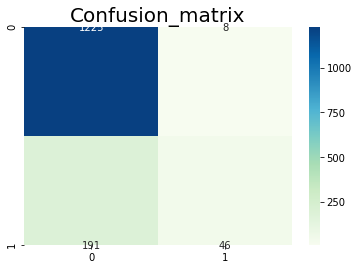

In [61]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

result_lr=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)

sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='',cmap="GnBu")

plt.title('Confusion_matrix', y=20, size=20)

In [32]:
from sklearn.metrics import precision_score,recall_score
precision=precision_score(Targeted_feature,y_pred,)
recall=recall_score(Targeted_feature,y_pred)
f1 = 2*(precision*recall)/(precision+recall)
print("precision is",round(precision,2))
print("recall is",round(recall,2))
print("f1 score is",round(f1,2))

precision is 0.73
recall is 0.36
f1 score is 0.48


In [26]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 86.85


The cross validated score for Random Forest Classifier is: 86.13


Text(0.5, 1.05, 'Confusion_matrix')

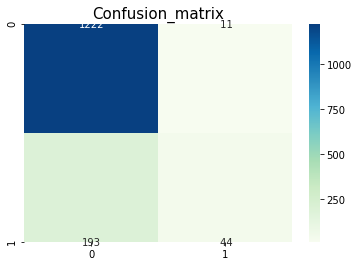

In [34]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="GnBu")
plt.title('Confusion_matrix', y=1.05, size=15)

In [35]:
precision=precision_score(Targeted_feature,y_pred,)
recall=recall_score(Targeted_feature,y_pred)
f1 = 2*(precision*recall)/(precision+recall)
print("precision is",round(precision,2))
print("recall is",round(recall,2))
print("f1 score is",round(f1,2))

precision is 0.8
recall is 0.19
f1 score is 0.3


In [68]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(X_train,y_train)
prediction_adb=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the AdaBoostClassifier is',round(accuracy_score(prediction_adb,y_test)*100,2))

--------------The Accuracy of the model----------------------------
The accuracy of the AdaBoostClassifier is 86.62


The cross validated score for AdaBoostClassifier is: 86.74


Text(0.5, 1.05, 'Confusion_matrix')

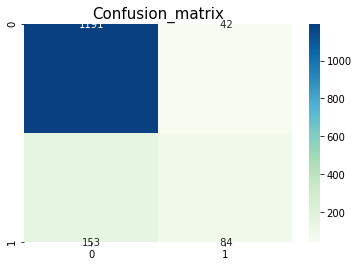

In [69]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_adb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_adb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="GnBu")
plt.title('Confusion_matrix', y=1.05, size=15)

In [38]:
precision=precision_score(Targeted_feature,y_pred,)
recall=recall_score(Targeted_feature,y_pred)
f1 = 2*(precision*recall)/(precision+recall)
print("precision is",round(precision,2))
print("recall is",round(recall,2))
print("f1 score is",round(f1,2))

precision is 0.64
recall is 0.37
f1 score is 0.47


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))


--------------The Accuracy of the model----------------------------
The accuracy of the Gradient Boosting Classifier is 86.62


The cross validated score for AdaBoostClassifier is: 86.6


Text(0.5, 1.05, 'Confusion_matrix')

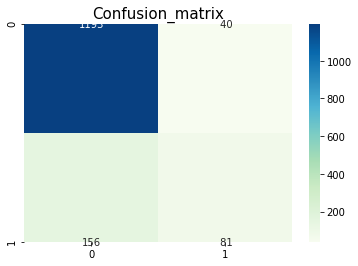

In [71]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gbc=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="GnBu")
plt.title('Confusion_matrix', y=1.05, size=15)

In [41]:
precision=precision_score(Targeted_feature,y_pred,)
recall=recall_score(Targeted_feature,y_pred)
f1 = 2*(precision*recall)/(precision+recall)
print("precision is",round(precision,2))
print("recall is",round(recall,2))
print("f1 score is",round(f1,2))

precision is 0.68
recall is 0.37
f1 score is 0.48


In [62]:
# Random Forest 
rf = RandomForestClassifier(n_estimators=100, class_weight = 'balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [63]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.873015873015873


In [78]:
rf.predict_proba(X_test)

array([[0.87, 0.13],
       [0.99, 0.01],
       [0.64, 0.36],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.78, 0.22],
       [0.96, 0.04],
       [0.88, 0.12],
       [0.78, 0.22],
       [0.76, 0.24],
       [0.74, 0.26],
       [0.72, 0.28],
       [0.91, 0.09],
       [0.77, 0.23],
       [0.96, 0.04],
       [0.83, 0.17],
       [0.78, 0.22],
       [0.95, 0.05],
       [0.95, 0.05],
       [0.94, 0.06],
       [0.88, 0.12],
       [0.97, 0.03],
       [0.95, 0.05],
       [0.91, 0.09],
       [0.91, 0.09],
       [0.79, 0.21],
       [0.6 , 0.4 ],
       [0.99, 0.01],
       [0.88, 0.12],
       [0.97, 0.03],
       [0.89, 0.11],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.92, 0.08],
       [0.68, 0.32],
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.86, 0.14],
       [0.65, 0.35],
       [0.98, 0.02],
       [0.88, 0.12],
       [0.86, 0.14],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.33, 0.67],
       [1.  , 0.  ],
       [0.58, 0.42],
       [0.43,

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[378   2]
 [ 54   7]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       380
           1       0.78      0.11      0.20        61

    accuracy                           0.87       441
   macro avg       0.83      0.55      0.57       441
weighted avg       0.86      0.87      0.83       441

0.873015873015873


The cross validated score for Random Forest Classifier is: 86.19


Text(0.5, 1.05, 'Confusion_matrix')

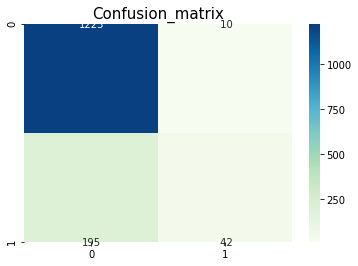

In [65]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_rm = cross_val_score(rf,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(rf,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="GnBu")
plt.title('Confusion_matrix', y=1.05, size=15)

In [66]:
import pandas as pd
feature_imp = pd.Series(rf.feature_importances_,index=all_features.columns).sort_values(ascending=False)
feature_imp

MonthlyIncome                        0.101395
fidelity                             0.094848
overall_satisf                       0.077542
OverTime                             0.068813
YearsAtCompany                       0.050167
DistanceFromHome                     0.049195
YearsInCurrentRole                   0.048607
PercentSalaryHike                    0.042598
YearsWithCurrManager                 0.042566
StockOptionLevel_0                   0.033156
YearsSinceLastPromotion              0.031936
MaritalStatus_Single                 0.027940
StockOptionLevel_1                   0.021246
Age_bin_under 30                     0.019841
MaritalStatus_Divorced               0.014042
Gender                               0.013684
Age_bin_30-40                        0.012681
Department_Research & Development    0.012543
EducationField_Life Sciences         0.012104
BusinessTravel_Travel_Frequently     0.011871
Education_3                          0.011362
Age_bin_40-50                     

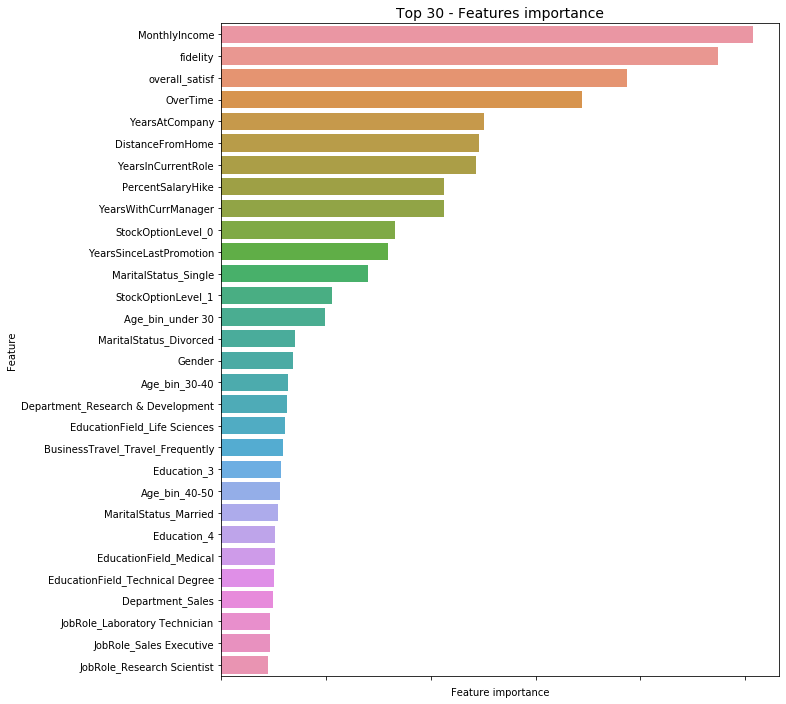

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
#sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
#plt.xlabel('Feature Importance Score')
#plt.ylabel('Features')
#plt.title("Visualizing Important Features")
#plt.legend()
#plt.figure(figsize = (10,12))
#plt.show()

def plot_feature_importance(model):
    tmp = pd.DataFrame({'Feature': feature_imp.index, 'Feature importance': feature_imp})
    tmp = tmp.sort_values(by='Feature importance',ascending=False).head(30)
    plt.figure(figsize = (10,12))
    plt.title('Top 30 - Features importance',fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
plot_feature_importance(rf)

In [213]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weight = compute_sample_weight('balanced', y_train)

In [214]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

gb_clf = GradientBoostingClassifier(n_estimators=20)
gb_clf.fit(X_train, y_train, sample_weight)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [215]:
prediction_gb_clf = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, prediction_gb_clf))

Accuracy: 0.8662131519274376


The cross validated score for Random Forest Classifier is: 86.4


Text(0.5, 1.05, 'Confusion_matrix')

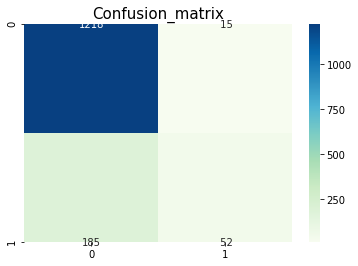

In [216]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_rm = cross_val_score(gb_clf,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(gb_clf,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="GnBu")
plt.title('Confusion_matrix', y=1.05, size=15)

In [217]:
Targeted_feature[Targeted_feature < 1].count()  

1233